## The dataset is based on the “Statlog Dataset” from the UCI Machine Learning Repository

### **Intoduction**

Description of variables:

| **Variable Name** | **Info about Variable** |
| - | - |
| Age | (numeric) |
| Sex | (text: male, female) |
| Job | (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled) |
| Housing | (text: own, rent, or free) |
| Saving accounts | (text - little, moderate, quite rich, rich) |
| Checking account | (text - little, moderate, rich) |
| Credit amount | (numeric, in Deutsche Mark) |
| Duration | (numeric, in month) |
| Purpose | (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others |


In [36]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### **Loading the dataset**
**Dimensions of the dataframe**

In [37]:
# loading dataset 
df = pd.read_csv(r'C:\Users\ASUS\Desktop\python\dataset\odin_school\statistics\german_credit_data.csv')

In [38]:
# to check how many rows and columns data has
df.shape 

(1000, 10)

In [39]:
print('Number of observations    : ', df.shape[0]) # number of rows in dataset
print('Number of variables       : ', df.shape[1]) # number of columns in dataset

Number of observations    :  1000
Number of variables       :  10


**Information about the schema**

In [40]:
# to show top observations
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [41]:
# to show bottom observations
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [42]:
# here we have an unnamed column as an index we should remove it as pandas already provide us indexing
df = df.drop(columns='Unnamed: 0')

In [43]:
# renaming the columns with extra spaces so dataset can read it properly if it's wrong read
df = df.rename(columns={
    'Saving accounts':'Saving_accounts',
    'Checking account':'Checking_account',
    'Credit amount':'Credit_amount'
})

In [44]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account',
       'Credit_amount', 'Duration', 'Purpose'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_accounts   817 non-null    object
 5   Checking_account  606 non-null    object
 6   Credit_amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


we know that there are only three colus are numerical , rest are catagorical.

In [46]:
df = df.astype({"Sex":'category',"Job":'category',"Housing":'category',"Saving_accounts":'category',"Checking_account":'category',"Purpose":'category'})

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   category
 2   Job               1000 non-null   category
 3   Housing           1000 non-null   category
 4   Saving_accounts   817 non-null    category
 5   Checking_account  606 non-null    category
 6   Credit_amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
 8   Purpose           1000 non-null   category
dtypes: category(6), int64(3)
memory usage: 30.6 KB


| Column Name | Type |
| --- | --- |
| Age | numeric |
| Sex | categorical |
| Job | numeric |
| Housing | categorical |
| Saving accounts | categorical |
| Checking account | categorical |
| Credit amount | numeric |
| Duration | numeric |
| Purpose | categorical |



In [48]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving_accounts       4
Checking_account      3
Credit_amount       921
Duration             33
Purpose               8
dtype: int64

**Statistical metrics of each column**

In [49]:
# for categorical columns
df.describe(include='category')

,Sex,Job,Housing,Saving_accounts,Checking_account,Purpose
count,1000,1000,1000,817,606,1000
unique,2,4,3,4,3,8
top,male,2,own,little,little,car
freq,690,630,713,603,274,337


In [50]:
# for numerical columns
df.describe(include='number') 

,Age,Credit_amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [51]:
df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [52]:
df.info()
# here we will see data types of every columns
# also if they have any null values or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   category
 2   Job               1000 non-null   category
 3   Housing           1000 non-null   category
 4   Saving_accounts   817 non-null    category
 5   Checking_account  606 non-null    category
 6   Credit_amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
 8   Purpose           1000 non-null   category
dtypes: category(6), int64(3)
memory usage: 30.6 KB


### **Pre-processing steps only as necessary along with the reason behind doing it with suitable steps**

1. Missing values

In [53]:
# to check sum of NaN values in columns
null_values = df.isna()
null_values.sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving_accounts     183
Checking_account    394
Credit_amount         0
Duration              0
Purpose               0
dtype: int64

In [54]:
# percentage of null values 
round(null_values.mean() * 100, 2)

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving_accounts     18.3
Checking_account    39.4
Credit_amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64

<AxesSubplot:>

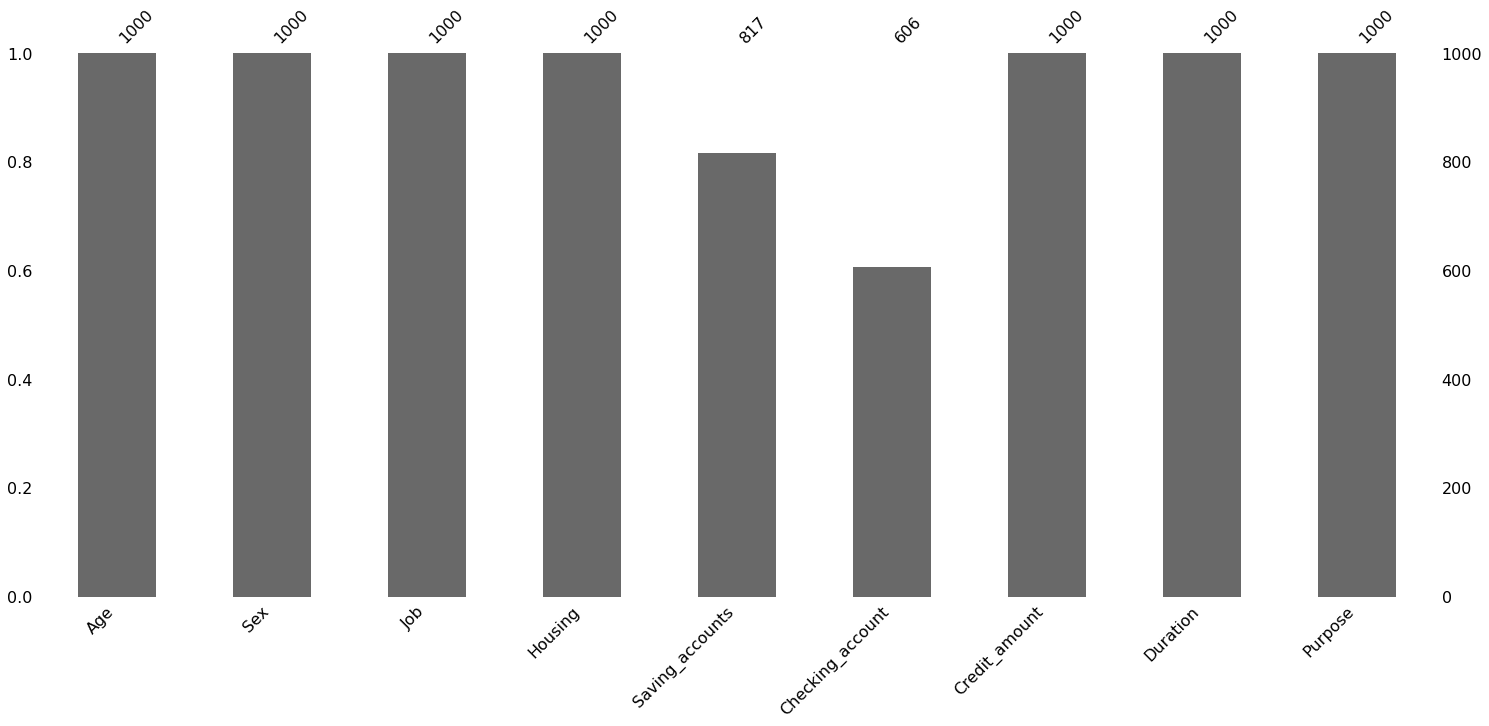

In [55]:
# to visualize missing values in columns
msno.bar(df)

In [56]:
# as you can see in above bar chart we have missing values in only two of the columns

2. Erroneous/wrong values

In [57]:
# calculating NaN percentage for Saving_ accounts and Checking_accounts columns 
saving_accounts_error = str((df.Saving_accounts.isna().sum() / df.shape[0]) * 100) + ' %'
print('Saving_accounts - ', saving_accounts_error)
Checking_account_error = str((df.Checking_account.isna().sum() / df.shape[0]) * 100) + ' %'
print('Checking_account - ', Checking_account_error)

Saving_accounts -  18.3 %
Checking_account -  39.4 %


<AxesSubplot:>

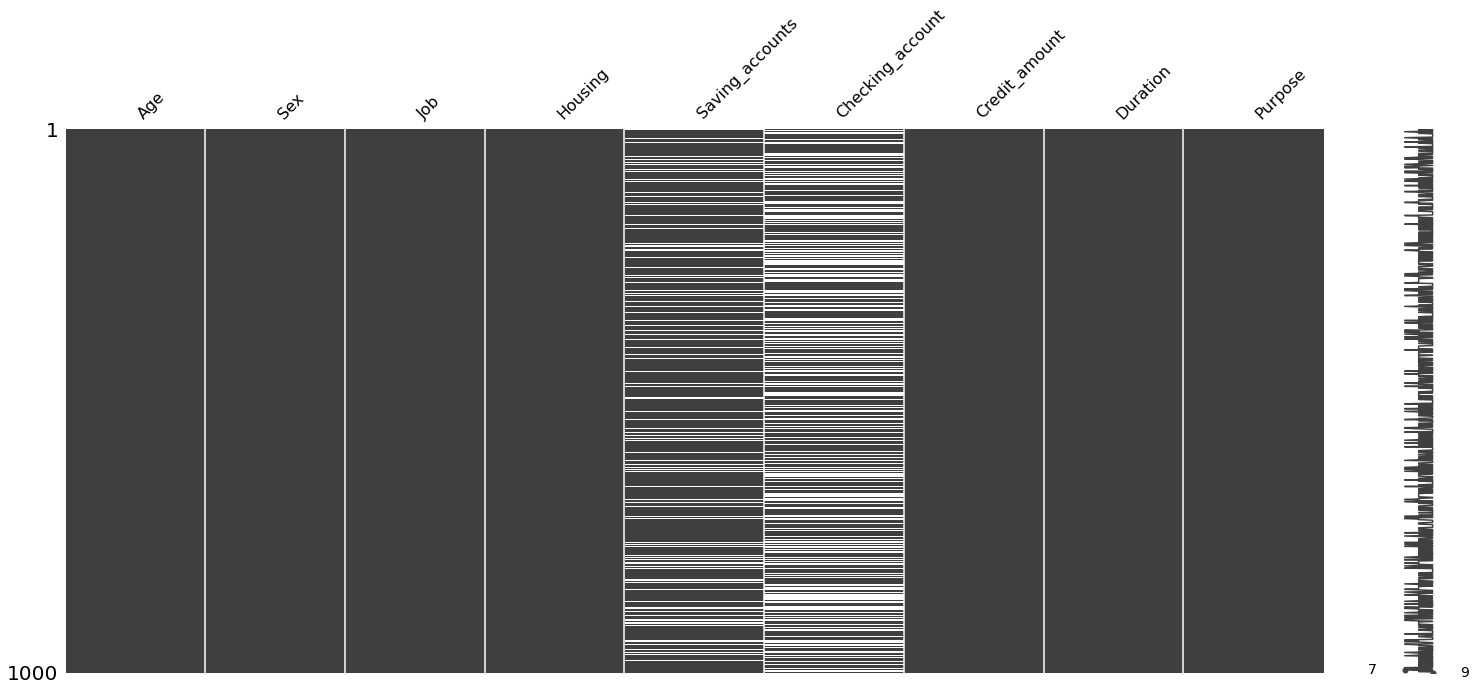

In [58]:
msno.matrix(df)

<AxesSubplot:>

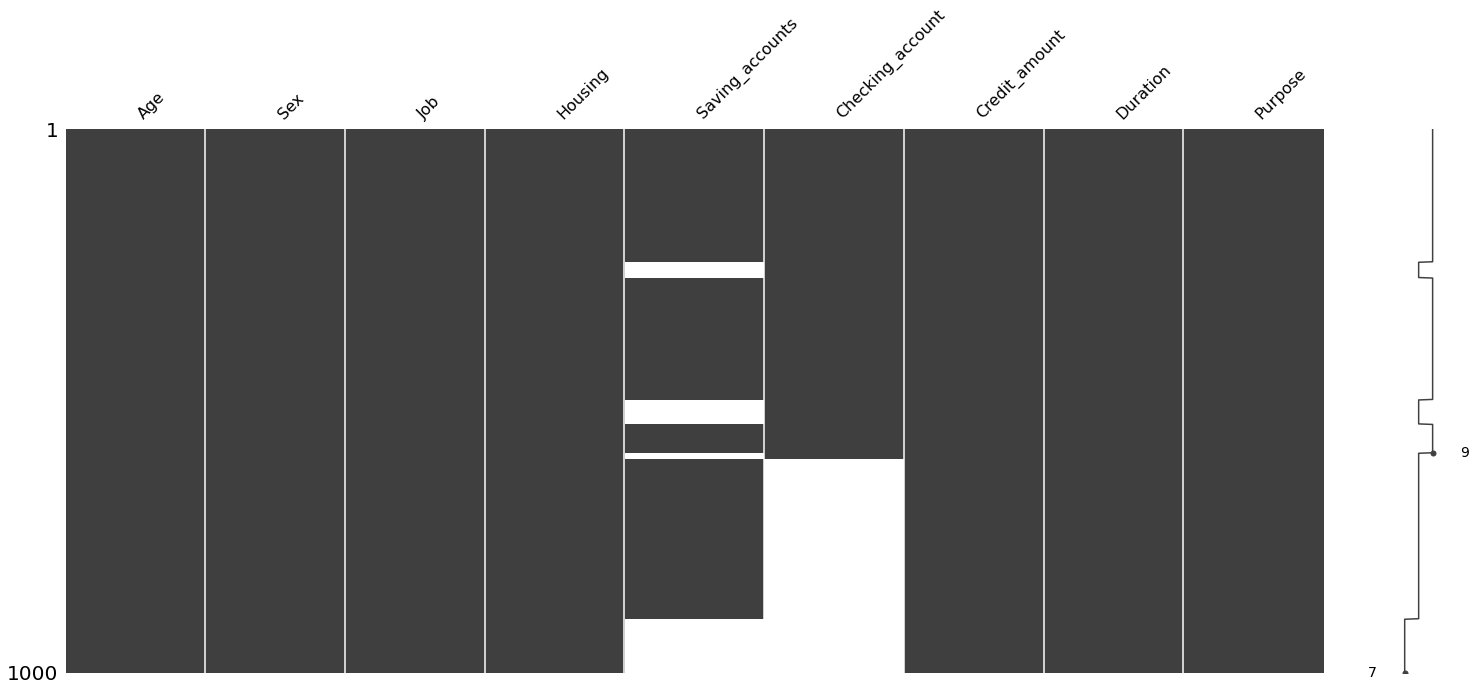

In [59]:
sorted_matrix = df.sort_values(['Checking_account','Saving_accounts'])
msno.matrix(sorted_matrix)

3. Skewed data

In [60]:
# changing categorical data to continuous to check the skewness
df['Saving_accounts'].unique()

[NaN, 'little', 'quite rich', 'rich', 'moderate']
Categories (4, object): ['little', 'moderate', 'quite rich', 'rich']

In [61]:
df['Saving_accounts'] = df.Saving_accounts.map({
    'little':0,
    'quite rich':1,
    'rich': 2,
    'moderate':3
    })

TypeError: 'Categorical' does not implement reduction 'mean'

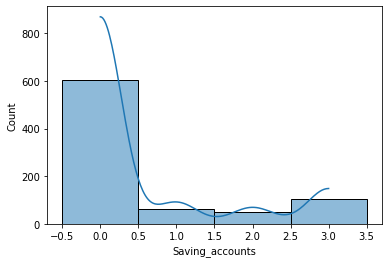

In [62]:
sns.histplot(data=df['Saving_accounts'], kde=True)
plt.axvline(x=df.Saving_accounts.mean(), color = 'red', alpha = 0.5, label = 'Mean')
plt.axvline(x=df.Saving_accounts.median(), color = 'blue', ls='--', alpha = 0.5, label = 'Median')
plt.legend()

In [ ]:
df['Checking_account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [ ]:
df['Checking_account'] = df.Checking_account.map({
    'little':0,
    'moderate':1,
    'rich': 2
    })

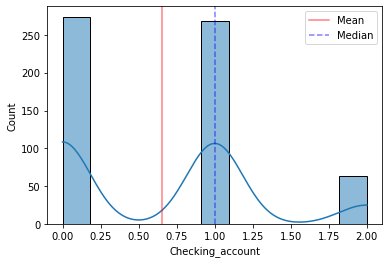

In [ ]:
sns.histplot(data=df['Checking_account'], kde=True)
plt.axvline(x=df.Checking_account.mean(), color = 'red', alpha = 0.5, label = 'Mean')
plt.axvline(x=df.Checking_account.median(), color = 'blue', ls='--', alpha = 0.5, label = 'Median')
plt.legend()

In [ ]:
# Saving_accounts is right skewed and Checking_amount is left skewed

4. Outliers

<AxesSubplot:xlabel='Saving_accounts', ylabel='Age'>

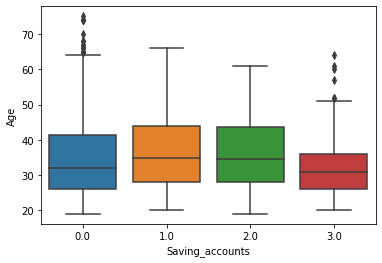

In [ ]:
sns.boxplot(x='Saving_accounts', y= 'Age', data= df)

<AxesSubplot:xlabel='Checking_account', ylabel='Age'>

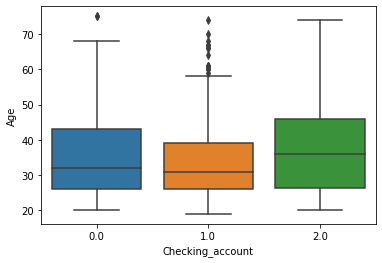

In [ ]:
sns.boxplot(x='Checking_account', y= 'Age', data= df)

### 4. Perform exploratory data analysis and provide key insights derived from the same backed with suitable graphs and plots. Few hints to get you started;

1. Distribution of numerical variables

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

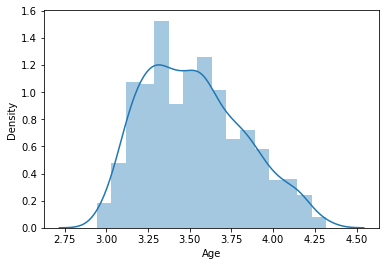

In [ ]:
age_log = np.log(df['Age'])
sns.distplot(age_log)

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_amount', ylabel='Density'>

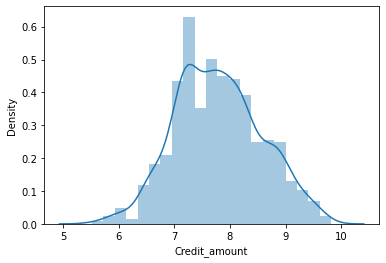

In [ ]:
credit_amount_log = np.log(df['Credit_amount'])
sns.distplot(credit_amount_log)

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

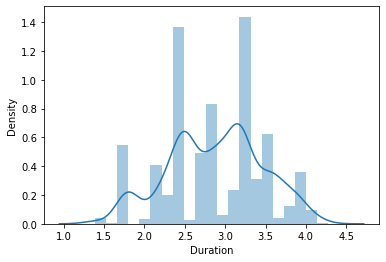

In [ ]:
duration_log = np.log(df['Duration'])
sns.distplot(duration_log)